<a href="https://colab.research.google.com/github/victory2588/Machine-Learning/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip
!ls
!pwd
print('Indexing word vectors')

--2022-11-14 06:22:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-14 06:22:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-14 06:22:16--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import os
import numpy as np
from scipy.spatial import distance

#IMDB 원본 데이터 읽기
fname='/content/glove.6B.100d.txt'
f=open(fname,encoding='utf8')

for line in f:
  print(type(line))
  print(line)
  break

# 사전 구축(딕셔너리 자료구조로 표현)
dictionary={}
for line in f:
  li=line.split()
  word=li[0]
  vector=np.asarray(li[1:],dtype='float32')
  dictionary[word]=vector

# 가장 가까운 단어를 찾아주는 함수
def find_closest_words(vector):
  return sorted(dictionary.keys(),key=lambda w: distance.euclidean(dictionary[w],vector))

# 가까운 단어 찾기
print(find_closest_words(dictionary['movie'])[:5])
print(find_closest_words(dictionary['school'])[:5])
print(find_closest_words(dictionary['oak'])[:5])

# 단어 추론
print(find_closest_words(dictionary["seoul"]-dictionary["korea"]+dictionary["spain"])[:5])
print(find_closest_words(dictionary["animal"]-dictionary["lion"]+dictionary["oak"])[:5])
print(find_closest_words(dictionary["queen"]-dictionary["king"]+dictionary["actress"])[:5])

<class 'str'>
the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

['movie', 'film', 'movies', 'films', 'hollywood']
['school', 'college', 'schools', 'elementary', 'students']
['oak', 'pine

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


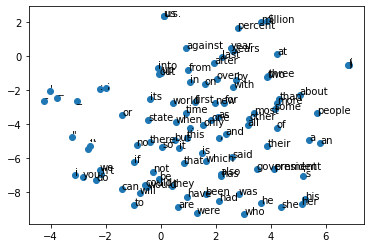

In [ ]:
# TSNE 사용: 고차원을 2, 3차원으로 축소하여 데이터를 가시화
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# tsne를 이용하여 2차원 공간으로 축소하고 시각화
tsne=TSNE(n_components=2,random_state=0)
words=list(dictionary.keys())
vectors=[dictionary[word] for word in words]
p2=tsne.fit_transform(vectors[:100])
plt.scatter(p2[:,0],p2[:,1])

for label,x,y in zip(words,p2[:,0],p2[:,1]):
  plt.annotate(label,xy=(x,y))

In [ ]:
from collections import Counter
import urllib.request #spam 메일 데이터 받아오려고
import pandas as pd
import numpy as np
import tensorflow as tf

import nltk
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 스팸 분류 데이터 로딩
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv",filename="spam.csv")
data=pd.read_csv('spam.csv',encoding='latin-1')
print('총 샘플의 수: ',len(data))
data[:5]

texts=list(data['v2'])
labels=list(data['v1'])
print(texts[:5])
print(labels[:5])

print(Counter(labels))

# 글로브 벡터 모델 초기화
glove={}
with open('glove.6B.50d.txt','r',encoding='utf-8') as fr:
  for line in fr.readlines():
    temp=line.strip().split()
    word=temp[0]
    vector=temp[1:]
    glove[word]=list(map(float,vector))

총 샘플의 수:  5572
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]
['ham', 'ham', 'spam', 'ham', 'ham']
Counter({'ham': 4825, 'spam': 747})


In [ ]:
def tokenize(document):
  words=[]
  # sentence tokenizing: 구문을 문장 단위로 분리
  sentences=sent_tokenize(document)

  for sentence in sentences:
    words.extend(WordPunctTokenizer().tokenize(sentence))
  return [word.lower() for word in words] # 표준화


def get_vector(sentence):
  tokens=tokenize(sentence)
  vector=[glove[token] if token in glove.keys() else [0]*50 for token in tokens]

  while len(vector)<256:
    vector.append([0]*50)
  return vector[:256]


In [ ]:
x=[get_vector(text) for text in texts]
x_train,x_test=np.array(x[:5000]),np.array(x[5000:])
y=[0 if label == 'spam' else 1 for label in labels]
y_train,y_test=np.array(y[:5000]),np.array(y[5000:])

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(x_train.shape[1],x_train.shape[2])))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

ev=model.evaluate(x_test,y_test,verbose=2)
print("손실함수: ",ev[0]," 정확성: ",ev[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              183296    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 199,874
Trainable params: 199,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
63/63 [==============================] - 6s 44ms/step - loss: 0.2252 - accuracy: 0.9187 - val_loss: 0.0940 - val_accuracy: 0.9700
Epoch 2/5
63/63 [==============================] - 2s 30ms/step - loss: 0.0965 - accuracy: 0.9695 - val_lo